<a href="https://colab.research.google.com/github/simonhiguera/Data_Science_300/blob/main/Taller_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

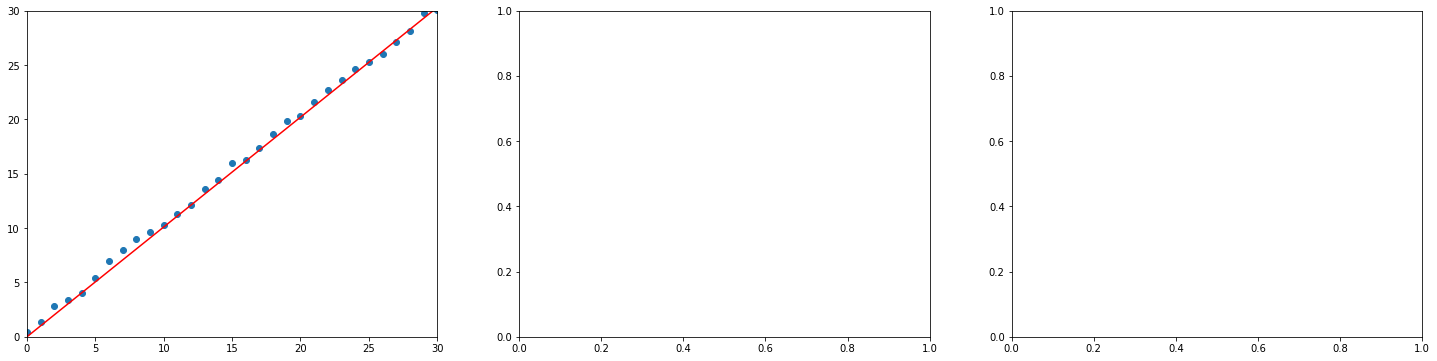

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import random
iris = load_iris()

# datos = pd.DataFrame( iris.data, columns = ['A','B','C','D'])

fig,axs = plt.subplots(1,3, figsize =(25,6))
def create_sample_rampa(n, b, var): #Data set artificial generado 
  y = []
  X = list(range(n))
  for i in range(len(X)):
    y.append(b+X[i]+random.random())
  return X,y

#graficar los puntos aplicando límite de axis y legenda.
b = 0
X_1,Y_1 = create_sample_rampa(500,b,1)
axs[0].scatter(X_1, Y_1)
axs[0].set_ylim(bottom = 0, top=30)
axs[0].set_xlim(left=0, right=30)

#postular una línea de tendencia 
x_a = np.asarray(X_1)
y_a = np.asarray(Y_1)
m1 = 1.01
mx = m1*x_a
y1 = mx+b
axs[0].plot(x_a,y1, 'r')

---------------------------
color  y -11.996374776870745
0.4697538965462783 1.0001161387543591
loss  -0.00010529262959371444


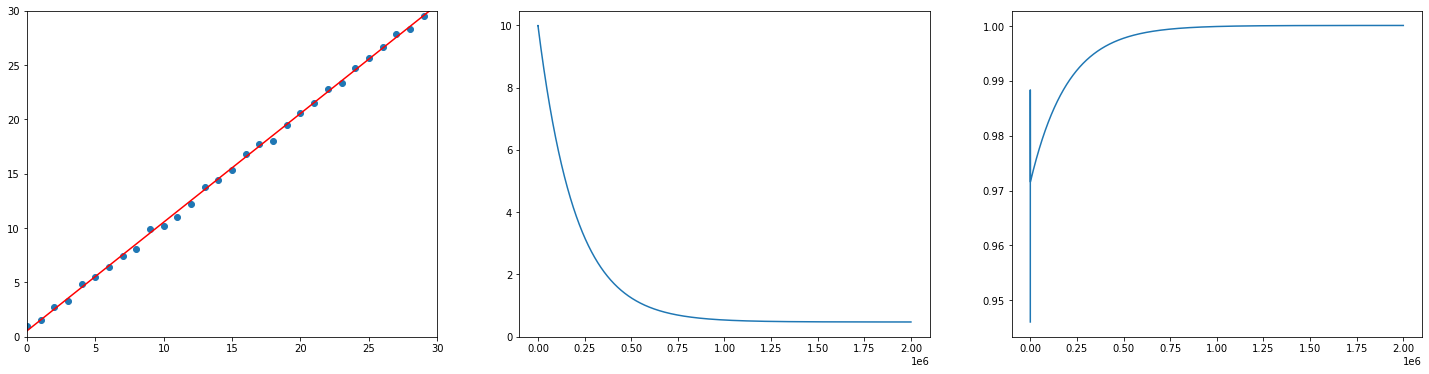

In [23]:
fig,axs = plt.subplots(1,3, figsize =(25,6))
def create_sample_rampa(n, b, var): #Data set artificial generado 
  y = []
  X = list(range(n))
  for i in range(len(X)):
    y.append(b+X[i]+random.random())
  return X,y

#graficar los puntos aplicando límite de axis y legenda.
b = 0
X_1,Y_1 = create_sample_rampa(500,b,1)
axs[0].scatter(X_1, Y_1)
axs[0].set_ylim(bottom = 0, top=30)
axs[0].set_xlim(left=0, right=30)

#ejecutar sobre estos datos el sistema de inteligencia artificial de acotamiento de pendiente el intercepto
def prediction(x, b, m):
  return (x*m+b)

def loss(X,  y, b, m):
  sum = 0
  for i in range(len(X)):
    sum += (y[i]-prediction(X[i], b, m))
    #print(y[i]-prediction(X[i], b, m))
  return sum/len(X)

def gradient_regression(X, y, alpha, b, w):# gradiente diferencia es la resta 
  dw = 0.0
  db = 0.0
  #we make the model by using all the samples
  for i in range(len(X)):
    aux = -2.0*(y[i]-(w*X[i]+b))
    db = db +aux #this solver can overflow
    dw = dw +X[i]*aux
  #aux = 1.0/float(len(X))
  b = b - db*alpha/float(len(X))
  w = w - dw*alpha/float(len(X))
  return b,w


def model(X,y,alpha,b,w,epochs):
  fig = 0
  b_v = []
  w_v = []
  for e in range(epochs):
    b,w = gradient_regression(X, y, alpha, b,w)
    b_v.append(b)
    w_v.append(w)
  return(b_v,w_v)  #print(b,w)

alpha = 0.00001
epochs = 2000000
b1 = 10
w = 1.01
#b_v,w_v = model(X_1,Y_1,alpha,b1,w,epochs)
x_z = np.array(list(range(len(b_v))))
y2 = w_v[-1]*x_z+b_v[-1]
for fig,c,b,w in zip([0,1,2,3],['y','r','g','b','k'],[b1],[w]):
  ls = loss(X_1, Y_1, b1, w)
  print("---------------------------")
  print("color ",c,ls)
  b_v,w_v = model(X_1,Y_1,alpha,b1,w,epochs)  
  z=np.array(range(len(b_v)))
  axs[1].plot(z,b_v)
  #axbm[0][fig].set_xlim(left = 0, right = 18)
  #axbm[0][fig].set_ylim(bottom = 4.4905, top = 4.503)
  axs[2].plot(z,w_v)
  #axbm[1][fig].set_xlim(left = 0, right = 45)
  #axbm[1][fig].set_ylim(bottom = -0.5, top = 1)
print(b_v[-1],w_v[-1])  
print("loss ",loss(X_1,  Y_1, b_v[-1],w_v[-1]))
axs[0].plot(x_z,y2, 'r')




In [31]:
print(b_v[-1])
print(w_v[-1])
print(loss(X_1, Y_1, b_v[-1], w_v[-1]))

0.4697538965462783
1.0001161387543591
-0.00010529262959371444
